In [392]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

In [393]:
# temporarily opening the fits file in order to extract data from the columns:
# 'BEST_Z' = redshift, 'L500' = luminosity at 500 kpc, 'F500' = flux at 500 kpc, 'EXT_LIKE' = extinction likelihood

with fits.open("erass1cl_primary_v3.2.fits") as hdu:
    data = hdu[1].data
    redshift = data['BEST_Z']
    lum = data['L500']
    flux = data['F500']
    ext = data['EXT_LIKE']

In [394]:
# initalize list for luminosity in ergs 
lum_erg = []

# convert inital luminosity values from units of 1e42 ergs s-1 to ergs s-1
for i in range(len(lum)):
    lum_erg.append(int(lum[i]) * 1e42)

In [395]:
# manually wrote out values I had already computed on the Google Doc
redshift_ediscs = [0.47,0.46,0.55,0.42,0.54,0.48,0.59,0.52,0.50,0.58,0.70,0.70,0.75,0.96,0.48,0.80,0.63,0.76]
lum_ediscs = [9.555e42,1.26e43,3.719e41,1.469e43,1.154e44,2.893e43,2.496e43,3.199e43,9.521e41,2.538e42,5.644e42,1.623e43,9.693e42,1.017e42,3.698e43,8.237e43,1.539e43,2.305e43]

<function matplotlib.pyplot.show(close=None, block=None)>

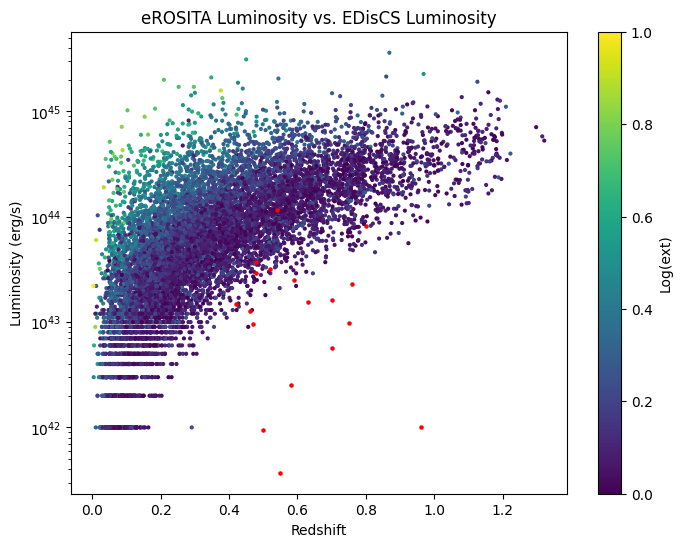

In [399]:
# plotted the observed eROSITA luminosities (inferno cmap) versus the calculated luminosites of the EDisCS survey (red scatterpoints)
plt.figure(figsize=(8, 6))
plt.title('eROSITA Luminosity vs. EDisCS Luminosity')
plt.xlabel('Redshift')
plt.ylabel('Luminosity (erg/s)')
plt.yscale('log')
plt.scatter(redshift,lum_erg,c=(np.log10(ext)),s=4)
plt.scatter(redshift_ediscs,lum_ediscs,s=5,color='red')

# added a colarbar to display the log10(extinction likelihood) against the observed luminosites of eROSITA
plt.colorbar(cmap='inferno',label='Log(ext)')
plt.show

In [349]:
# generated cosmology object
cosmo =  FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
lum_distance = []

# used the cosmology object to find the luminosity distances for each redshift
for i in range(len(redshift)):
    distance = cosmo.luminosity_distance(redshift[i]) 
    lum_distance.append(distance)

In [350]:
# initalized an array for changing the units of the inital flux array
flux_corrected = []

# changed flux values from units 1e-14 erg/s/cm2 to erg/s/cm2
for i in range(len(flux)):
    flux_corrected.append(flux[i]* u.erg / u.s / u.cm**2 * 1e-14)

In [374]:
# initalized array for the predicted luminosities 
pred_lum = []

# inputted flux and luminosity distances into inverse square law and checedk predicted luminosities against observed luminosities
for i in range(len(redshift)):
    L = ((flux_corrected[i])*4*(math.pi)*((lum_distance[i])**2)).to(u.erg / u.s)
    pred_lum.append(L)


In [381]:
# initialized flux limit and luminosity curve array
flux_limit = 4e-14 * u.erg / u.s / u.cm**2
L_limit = []

# calculated luminosity curve with inputting luminosity distances and the flux limit into the inverse square law
for i in range(len(redshift)):
    L = (4 * np.pi * (lum_distance[i])**2 * flux_limit).to(u.erg / u.s)
    L_limit.append(L)

In [382]:
# initalized arrays for the correction of the astropy Quantity lists
L_limit_fix = []
redshift_final = []

# set a range for luminosity and redshift ranges that we care about and corrected each member of the luminosity curve and redshift to be dimensionless
for i in range(len(L_limit)):
    if redshift[i] < 1.4 and L_limit[i].value > 5e41:
        L_limit_fix.append(L_limit[i].value)
        redshift_final.append(redshift[i])

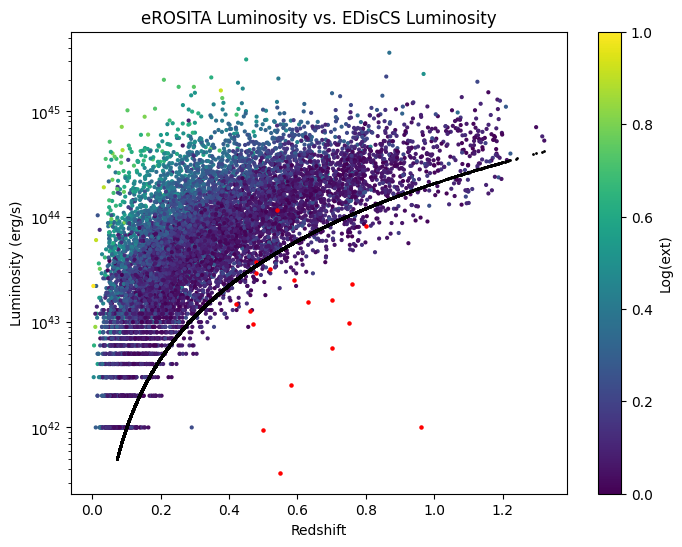

In [398]:
# plotted the same eROSITA Luminosity vs. EDisCS Luminsity plot with an overlaid luminosity limit curve (black)
plt.figure(figsize=(8, 6))
plt.title('eROSITA Luminosity vs. EDisCS Luminosity')
plt.yscale('log')
plt.xlabel('Redshift')
plt.ylabel('Luminosity (erg/s)')
plt.scatter(redshift,lum_erg,c=ext_log,s=4)
plt.scatter(redshift_ediscs,lum_ediscs,s=5,color='red')
plt.colorbar(cmap='inferno',label='Log(ext)')
plt.scatter(redshift_final, L_limit_fix, label='Luminosity Curve',s=1,color='black')
plt.show()